Import Libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [19]:
df = pd.read_csv("Mall_Customers.csv")

In [20]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [22]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [23]:
df.count()

,0
CustomerID,200
Genre,200
Age,200
Annual Income (k$),200
Spending Score (1-100),200


In [24]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [25]:
df = df.drop('CustomerID', axis=1)

In [26]:
df.rename(columns={'Genre': 'Gender'}, inplace=True)


In [27]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [28]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

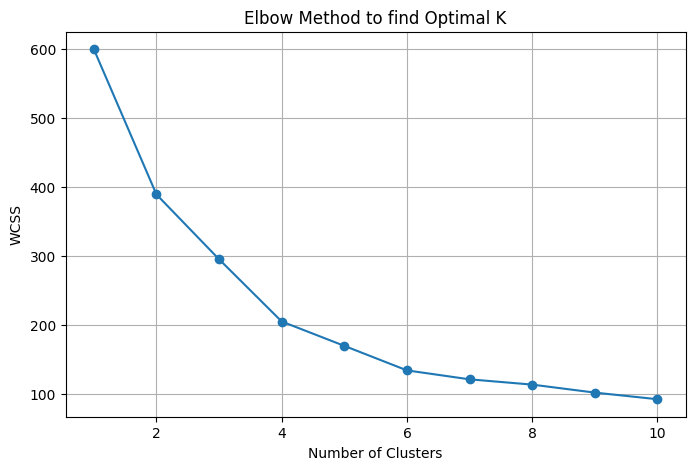

In [31]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to find Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [32]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

df['Cluster'] = y_kmeans

Analyze the clusters

In [33]:
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)

print(df['Cluster'].value_counts())


           Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.430769  53.984615           47.707692               39.969231
1        0.450000  32.875000           86.100000               81.525000
2        0.403509  25.438596           40.000000               60.298246
3        0.500000  39.368421           86.500000               19.578947
Cluster
0    65
2    57
1    40
3    38
Name: count, dtype: int64


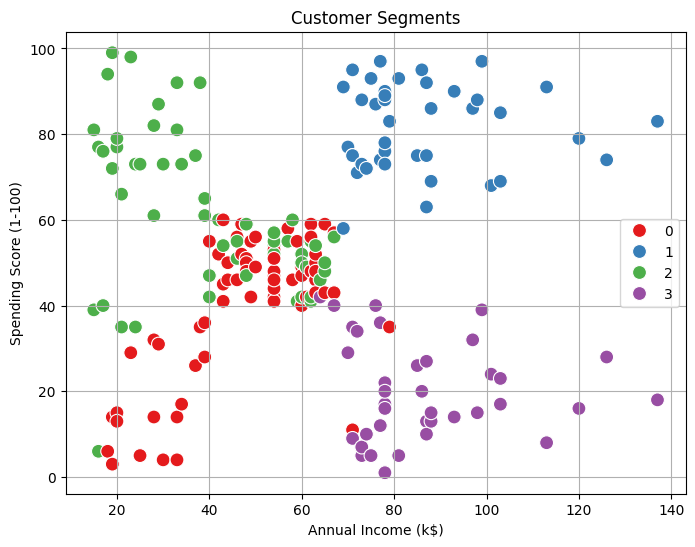

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1', s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()
